In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("üå´üõ∏")

üå´üõ∏


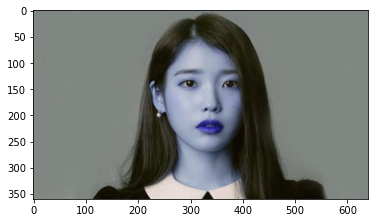

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/iu1.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
plt.imshow(img_bgr)
plt.show()

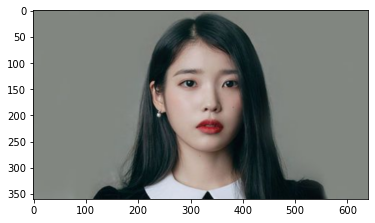

In [3]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
print("üå´üõ∏")

üå´üõ∏


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("üå´üõ∏")

üå´üõ∏


rectangles[[(242, 77) (428, 263)]]


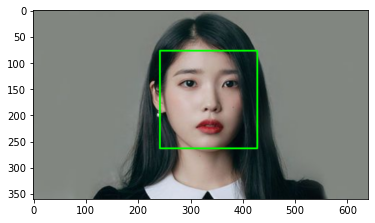

In [6]:
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


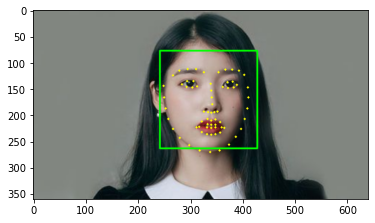

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[2][0]
    y = landmark[36][1]
    w = (landmark[30][0] - x)*2
    h = landmark[48][1] - y

In [12]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(82, 178, 3)


In [13]:
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]

In [14]:
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 255, sticker_area, img_sticker).astype(np.uint8)

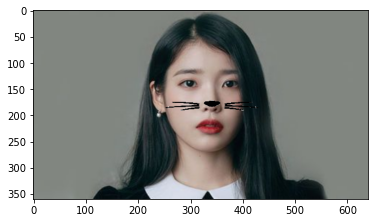

In [15]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()